In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.rcParams['font.size'] = 13
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.figsize'] = (16,10)
sns.set_style("dark")

In [ ]:
data = pd.read_csv("/content/Top 1000 IMDB movies (1) (1).csv")
data_temp = data.copy()

In [ ]:
data.head(15)

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,0,The Shawshank Redemption,(1994),142 min,9.3,81,"34,709",$28.34M,Two imprisoned men bond over a number of years...
1,1,The Godfather,(1972),175 min,9.2,100,"34,709",$134.97M,The aging patriarch of an organized crime dyna...
2,2,The Dark Knight,(2008),152 min,9.0,84,"34,709",$534.86M,When the menace known as the Joker wreaks havo...
3,3,The Lord of the Rings: The Return of the King,(2003),201 min,9.0,94,"34,709",$377.85M,Gandalf and Aragorn lead the World of Men agai...
4,4,Schindler's List,(1993),195 min,9.0,94,"34,709",$96.90M,"In German-occupied Poland during World War II,..."
5,5,The Godfather: Part II,(1974),202 min,9.0,90,"34,709",$57.30M,The early life and career of Vito Corleone in ...
6,6,12 Angry Men,(1957),96 min,9.0,96,"34,709",$4.36M,The jury in a New York City murder trial is fr...
7,7,Jai Bhim,(2021),164 min,8.9,****,"34,709",#248,When a tribal man is arrested for a case of al...
8,8,Pulp Fiction,(1994),154 min,8.9,94,"34,709",$107.93M,"The lives of two mob hitmen, a boxer, a gangst..."
9,9,Inception,(2010),148 min,8.8,74,"34,709",$292.58M,A thief who steals corporate secrets through t...


In [ ]:
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)
else:
    print("Column 'Unnamed: 0' not found in the DataFrame.")

In [ ]:
data.columns

Index(['Movie Name', 'Year of Release', 'Watch Time', 'Movie Rating',
       'Meatscore of movie', 'Votes', 'Gross', 'Description'],
      dtype='object')

In [ ]:
data.nunique()

,0
Movie Name,996
Year of Release,121
Watch Time,141
Movie Rating,17
Meatscore of movie,62
Votes,1
Gross,746
Description,1000


In [ ]:
data.shape

(1000, 8)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Top 1000 IMDB movies (1) (1).csv to Top 1000 IMDB movies (1) (1).csv


In [ ]:
import pandas as pd

data = pd.read_csv("Top 1000 IMDB movies (1) (1).csv")


In [ ]:
data[data['Movie Name'].duplicated(keep="last")]

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
97,97,Drishyam,(2013),160 min,8.3,****,"34,709",%^%^%^,A man goes to extreme lengths to save his fami...
116,116,Scarface,(1983),170 min,8.3,65,"34,709",$45.60M,"In 1980 Miami, a determined Cuban immigrant ta..."
406,406,Beauty and the Beast,(1991),84 min,8.0,95,"34,709",$218.97M,A prince cursed to spend his days as a hideous...
627,627,The Girl with the Dragon Tattoo,(2011),158 min,7.8,71,"34,709",$102.52M,Journalist Mikael Blomkvist is aided in his se...


In [ ]:
data[data['Movie Name'].duplicated(keep="first")]

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
146,146,Drishyam,(2015),163 min,8.2,****,"34,709",$0.74M,Desperate measures are taken by a man who trie...
581,581,Beauty and the Beast,(1946),93 min,7.9,92,"34,709",$0.30M,A beautiful young woman takes her father's pla...
638,638,The Girl with the Dragon Tattoo,(2009),152 min,7.8,76,"34,709",$10.10M,A journalist is aided by a young female hacker...
908,908,Scarface,(1932),93 min,7.7,87,"34,709",%^%^%^,An ambitious and nearly insane violent gangste...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   object 
 3   Watch Time          1000 non-null   object 
 4   Movie Rating        1000 non-null   float64
 5   Meatscore of movie  1000 non-null   object 
 6   Votes               1000 non-null   object 
 7   Gross               1000 non-null   object 
 8   Description         1000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.4+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


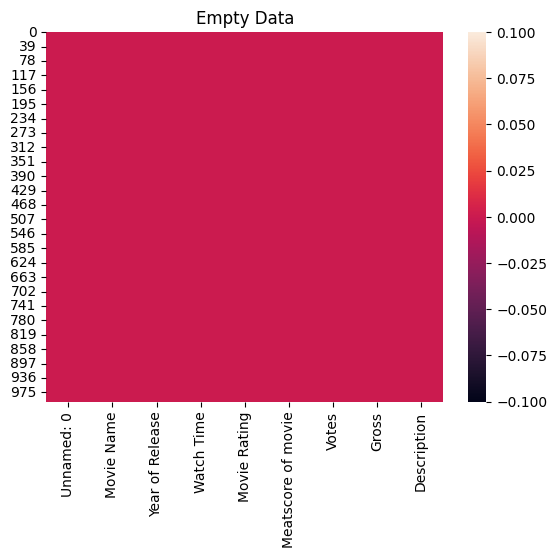

In [ ]:
sns.heatmap(data.isnull())
plt.title("Empty Data")
plt.show()


In [ ]:
data['Year of Release'].dtype

dtype('O')

In [ ]:
data['Year of Release'].iloc[1]

'(1972)'

In [ ]:
type(data['Year of Release'].iloc[1])

str

In [ ]:
data['Year of Release'].iloc[1][0]

'('

In [ ]:
def filterYear(data):
    extract_year = re.findall('[ 0-9]',data)
    return ''.join(extract_year)

In [ ]:
import re


In [ ]:
import re

def filterYear(data):
    # Extract a 4-digit year from the string
    match = re.search(r'\d{4}', str(data))
    return match.group() if match else None


In [ ]:
data['ReleaseYear'] = data['Year of Release'].apply(filterYear)

In [ ]:
if 'Year of Release' in data.columns:
    data.drop("Year of Release",axis=1,inplace=True)
else:
    print("Column 'Year of Release' not found in the DataFrame, skipping drop.") # Inform the user if the column is already dropped.

In [ ]:
data.sample(4)

,Unnamed: 0,Movie Name,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description,ReleaseYear
281,281,Dead Poets Society,128 min,8.1,79,"34,709",$95.86M,Maverick teacher John Keating uses poetry to e...,1989
67,67,Coco,105 min,8.4,81,"34,709",$209.73M,"Aspiring musician Miguel, confronted with his ...",2017
698,698,The Breakfast Club,97 min,7.8,66,"34,709",$45.88M,Five high school students meet in Saturday det...,1985
991,991,The Birds,119 min,7.6,90,"34,709",$11.40M,A wealthy San Francisco socialite pursues a po...,1963


In [ ]:
data.Votes.nunique()

1

In [ ]:
if 'Votes' in data.columns:
    data.drop('Votes', axis=1, inplace=True)
else:
    print("Column 'Votes' not found in the DataFrame, skipping drop.")

In [ ]:
data.shape

(1000, 8)

In [ ]:
data.sample(4)

,Unnamed: 0,Movie Name,Watch Time,Movie Rating,Meatscore of movie,Gross,Description,ReleaseYear
311,311,Ben-Hur,212 min,8.1,90,$74.70M,After a Jewish prince is betrayed and sent int...,1959
24,24,Spirited Away,125 min,8.6,96,$10.06M,"During her family's move to the suburbs, a sul...",2001
619,619,English Vinglish,134 min,7.8,****,$1.67M,"A quiet, sweet tempered housewife endures smal...",2012
224,224,The Grand Budapest Hotel,99 min,8.1,88,$59.10M,A writer encounters the owner of an aging high...,2014


In [ ]:
def filterWatchTime(data):
    return data[:-4]

In [ ]:
data['TotalTime'] = data['Watch Time'].apply(filterWatchTime)

In [ ]:
data.drop('Watch Time',inplace=True,axis=1)

In [ ]:
data.sample(10)

,Unnamed: 0,Movie Name,Movie Rating,Meatscore of movie,Gross,Description,ReleaseYear,TotalTime
638,638,The Girl with the Dragon Tattoo,7.8,76,$10.10M,A journalist is aided by a young female hacker...,2009,152
940,940,Stardust,7.6,66,$38.63M,In a countryside town bordering on a magical l...,2007,127
428,428,The Last Picture Show,8.0,93,$29.13M,"In 1951, a group of high schoolers come of age...",1971,118
670,670,Remember the Titans,7.8,48,$115.65M,The true story of a newly appointed African-Am...,2000,113
5,5,The Godfather: Part II,9.0,90,$57.30M,The early life and career of Vito Corleone in ...,1974,202
539,539,My Left Foot,7.9,97,$14.74M,"Christy Brown, born with cerebral palsy, learn...",1989,103
500,500,Dallas Buyers Club,7.9,79,$27.30M,"In 1985 Dallas, electrician and hustler Ron Wo...",2013,117
376,376,Tae Guk Gi: The Brotherhood of War,8.0,64,$1.11M,When two brothers are forced to fight in the K...,2004,140
57,57,Casablanca,8.5,100,$1.02M,A cynical expatriate American cafe owner strug...,1942,102
37,37,Parasite,8.5,96,$53.37M,Greed and class discrimination threaten the ne...,2019,132


In [ ]:
data['Meatscore of movie'].unique()

array(['81        ', '100        ', '84        ', '94        ',
       '90        ', '96        ', '****', '74        ', '87        ',
       '66        ', '92        ', '82        ', '73        ',
       '78        ', '79        ', '91        ', '61        ',
       '59        ', '65        ', '75        ', '85        ',
       '98        ', '89        ', '88        ', '57        ',
       '67        ', '62        ', '77        ', '64        ',
       '80        ', '97        ', '99        ', '68        ',
       '95        ', '76        ', '86        ', '71        ',
       '69        ', '55        ', '70        ', '58        ',
       '83        ', '60        ', '63        ', '72        ',
       '93        ', '54        ', '33        ', '47        ',
       '49        ', '50        ', '51        ', '56        ',
       '53        ', '48        ', '45        ', '52        ',
       '44        ', '36        ', '46        ', '30        ',
       '28        '], dtype=object)

In [ ]:
def filterMeatScore(data):
    if data == "****":
        return np.nan
    return data.strip()

In [ ]:
import re

def filterMeatScore(text):
    match = re.search(r'\d+', str(text))  # Finds the first number
    return int(match.group()) if match else None


In [ ]:
data['Meatscore'] = data['Meatscore of movie'].apply(filterMeatScore)


In [ ]:
data.drop("Meatscore of movie",axis=1,inplace=True)

In [ ]:
data.shape

(1000, 8)

In [ ]:
checkGrossList = []
for checkGross in data['Gross'].unique():
    if checkGross[0] != '$':
        checkGrossList.append(checkGross)

In [ ]:
def filterGross(data):
    if data in checkGrossList:
        return np.nan
    return data

In [ ]:
import re

def filterGross(gross_str):
    if pd.isna(gross_str):
        return None
    # Remove non-digit characters
    digits = re.sub(r'[^\d]', '', str(gross_str))
    return int(digits) if digits else None


In [ ]:
data['Worth'] = data['Gross'].apply(filterGross)


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Movie Name,0
Movie Rating,0
Gross,0
Description,0
ReleaseYear,0
TotalTime,0
Meatscore,164
Worth,153


In [ ]:
data.drop("Gross",axis=1,inplace=True)

In [ ]:
data.sample(3)

,Unnamed: 0,Movie Name,Movie Rating,Description,ReleaseYear,TotalTime,Meatscore,Worth
498,498,"4 Months, 3 Weeks and 2 Days",7.9,A woman assists her friend in arranging an ill...,2007,113,97.0,119.0
288,288,Gandhi,8.1,The life of the lawyer who became the famed le...,1982,191,79.0,5277.0
617,617,Big Hero 6,7.8,A special bond develops between plus-sized inf...,2014,102,74.0,22253.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   Movie Name    1000 non-null   object 
 2   Movie Rating  1000 non-null   float64
 3   Description   1000 non-null   object 
 4   ReleaseYear   1000 non-null   object 
 5   TotalTime     1000 non-null   object 
 6   Meatscore     836 non-null    float64
 7   Worth         847 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [ ]:
data.fillna(method="bfill",inplace=True)

<ipython-input-48-02a59bec6f69>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="bfill",inplace=True)


In [ ]:
data['ReleaseYear'] = data['ReleaseYear'].astype(int)
data['Meatscore'] = data['Meatscore'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   Movie Name    1000 non-null   object 
 2   Movie Rating  1000 non-null   float64
 3   Description   1000 non-null   object 
 4   ReleaseYear   1000 non-null   int64  
 5   TotalTime     1000 non-null   object 
 6   Meatscore     1000 non-null   int64  
 7   Worth         998 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [ ]:
data[data['Movie Rating'] == data['Movie Rating'].max()]

,Unnamed: 0,Movie Name,Movie Rating,Description,ReleaseYear,TotalTime,Meatscore,Worth
0,0,The Shawshank Redemption,9.3,Two imprisoned men bond over a number of years...,1994,142,81,2834.0


In [ ]:
top10Movies = data.nlargest(10,'Movie Rating')

In [ ]:
top10Movies

,Unnamed: 0,Movie Name,Movie Rating,Description,ReleaseYear,TotalTime,Meatscore,Worth
0,0,The Shawshank Redemption,9.3,Two imprisoned men bond over a number of years...,1994,142,81,2834.0
1,1,The Godfather,9.2,The aging patriarch of an organized crime dyna...,1972,175,100,13497.0
2,2,The Dark Knight,9.0,When the menace known as the Joker wreaks havo...,2008,152,84,53486.0
3,3,The Lord of the Rings: The Return of the King,9.0,Gandalf and Aragorn lead the World of Men agai...,2003,201,94,37785.0
4,4,Schindler's List,9.0,"In German-occupied Poland during World War II,...",1993,195,94,9690.0
5,5,The Godfather: Part II,9.0,The early life and career of Vito Corleone in ...,1974,202,90,5730.0
6,6,12 Angry Men,9.0,The jury in a New York City murder trial is fr...,1957,96,96,436.0
7,7,Jai Bhim,8.9,When a tribal man is arrested for a case of al...,2021,164,94,248.0
8,8,Pulp Fiction,8.9,"The lives of two mob hitmen, a boxer, a gangst...",1994,154,94,10793.0
9,9,Inception,8.8,A thief who steals corporate secrets through t...,2010,148,74,29258.0


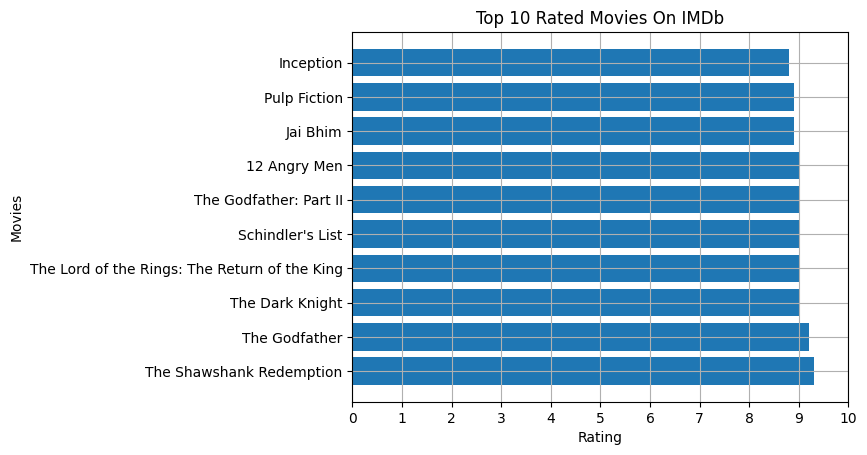

In [ ]:
plt.barh(top10Movies['Movie Name'],top10Movies['Movie Rating'])
plt.title("Top 10 Rated Movies On IMDb")
plt.xticks(range(11))
plt.xlabel("Rating")
plt.ylabel("Movies")
plt.grid("on")

Text(0.5, 0, 'Movies')

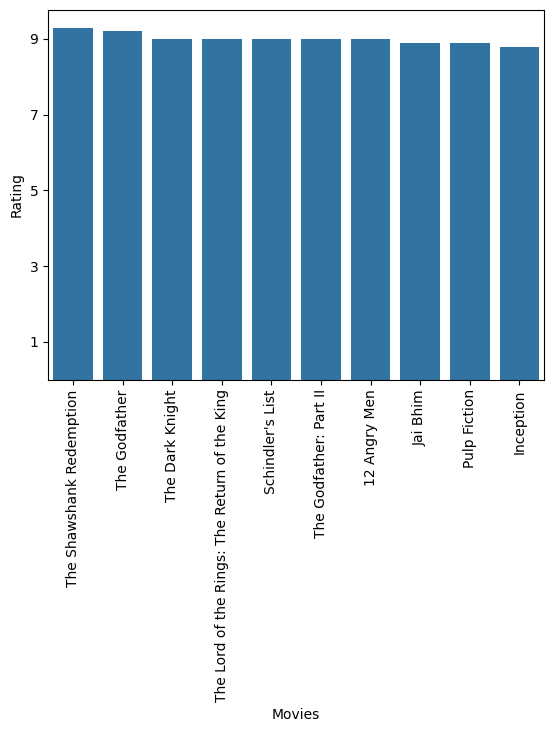

In [ ]:
sns.barplot(x='Movie Name', y='Movie Rating', data=top10Movies)
plt.xticks(rotation=90)
plt.yticks(range(1,11,2))
plt.ylabel("Rating")
plt.xlabel("Movies")

Text(0.5, 0, 'Year')

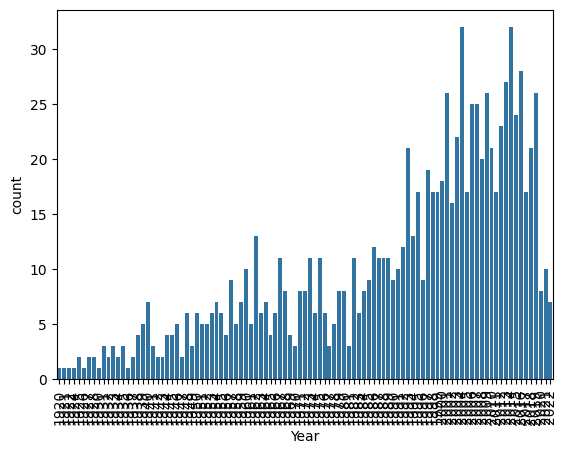

In [ ]:
sns.countplot(data=data,x='ReleaseYear')
plt.xticks(rotation=90)
plt.xlabel("Year")

In [ ]:
movie_per_year = data.groupby("ReleaseYear")['Movie Name'].count()

In [ ]:
movie_per_year.sort_values(ascending=False)

,Movie Name
ReleaseYear,
2014,32
2004,32
2016,28
2013,27
2001,26
...,...
1930,1
1920,1
1921,1


In [ ]:
import plotly.express as px # Import the plotly.express library and assign it to the alias 'px'.

ax = px.histogram(data,x="TotalTime",marginal="box",title="Total Time")
ax.update_layout(bargap=0.2)

In [ ]:
ax = px.histogram(data,x="Meatscore",marginal="box",title="Meat Score")
ax.update_layout(bargap=0.25)

In [ ]:
data['Worth'] = data['Worth'].astype(str)
for gross_check in data['Worth']:
    if 'B' in gross_check:
        print("More than Million:",gross_check)
    elif 'M' not in gross_check:
        print("Less than Million:",gross_check)

Less than Million: nan
Less than Million: nan


In [ ]:
def filterGross(data):
    extract_gross = re.findall('[ 0-9]',data)
    return ''.join(extract_gross)

In [ ]:
import re

def filterGross(data):
    # Convert the input to a string before applying regex
    data_str = str(data)
    extract_gross = re.findall('[ 0-9]', data_str)
    return ''.join(extract_gross)

In [ ]:
data['Worth'] = data['Worth'].apply(filterGross)

In [ ]:
data['Worth']

,Worth
0,2834
1,13497
2,53486
3,37785
4,9690
...,...
995,3050
996,3050
997,18493
998,


In [ ]:
ax = px.histogram(data,x="Worth",marginal="box",title="Worth In Million")
ax.update_layout(bargap=0.25)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data["Description"])

# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Indexing by Movie Name
index_sim = pd.Series(data.index, index=data['Movie Name']).drop_duplicates()


In [ ]:
tfidf_matrix.shape

(1000, 5583)

In [ ]:
cosine_sim.shape

(1000, 1000)

In [ ]:
def get_recommendations(title):
    idx = index_sim[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return list(data['Movie Name'].iloc[movie_indices].values)

In [ ]:
data['Movie Name'].unique()

array(['The Shawshank Redemption', 'The Godfather', 'The Dark Knight',
       'The Lord of the Rings: The Return of the King',
       "Schindler's List", 'The Godfather: Part II', '12 Angry Men',
       'Jai Bhim', 'Pulp Fiction', 'Inception',
       'The Lord of the Rings: The Two Towers', 'Fight Club',
       'The Lord of the Rings: The Fellowship of the Ring',
       'Forrest Gump', 'The Good, the Bad and the Ugly',
       'Soorarai Pottru', 'The Matrix', 'Goodfellas',
       'Star Wars: Episode V - The Empire Strikes Back',
       "One Flew Over the Cuckoo's Nest", 'Vikram', 'Top Gun: Maverick',
       'Interstellar', 'City of God', 'Spirited Away',
       'Saving Private Ryan', 'The Green Mile', 'Life Is Beautiful',
       'Se7en', 'Terminator 2: Judgment Day', 'The Silence of the Lambs',
       'Star Wars', 'Harakiri', 'Seven Samurai', "It's a Wonderful Life",
       'Kaithi', 'Asuran', 'Parasite', 'Whiplash', 'The Intouchables',
       'Sardar Udham', 'The Prestige', 'The Depart

In [ ]:
get_recommendations('The Third Man')

['Laura',
 'Midnight Cowboy',
 'The Edge of Heaven',
 'Taken',
 'Up',
 'The Man Who Shot Liberty Valance',
 'The Green Mile',
 'Before Midnight',
 'V for Vendetta',
 'Before Sunrise']